In [ ]:
import gymnasium as gym
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make('LunarLander-v3', render_mode='rgb_array')

num_episodes = 100
max_memory_size = 1024 * 16
batch_size = 64

In [2]:
from models import NaiveDeepQNetwork, ReplayMemory

dqn = NaiveDeepQNetwork(env)
memory = ReplayMemory(max_memory_size)

/Users/bread/Library/Python/3.9/lib/python/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


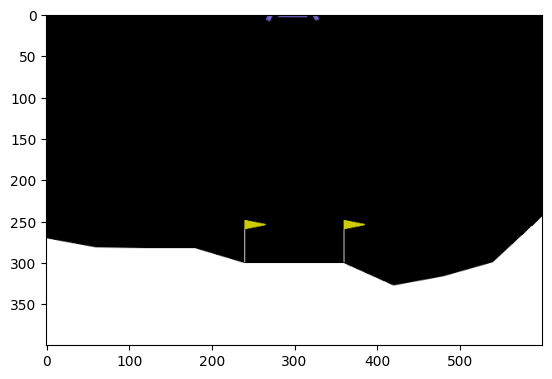

In [ ]:
total_rewards = []

for _ in range(num_episodes):
    obs, info = env.reset()
    img = plt.imshow(env.render()) # only call this once
    tr = 0

    while True:
        action = dqn.take_action(obs)
        next_obs, reward, terminated, truncated, info = env.step(action)

        # train model
        memory.push(obs, action, reward, next_obs, terminated)
        transitions = memory.sample(batch_size)
        dqn.train(transitions)

        # update env. display
        img.set_data(env.render()) # just update the data
        display.display(plt.gcf())
        display.clear_output(wait=True)

        if terminated:
            break

        next_obs = obs
        tr += reward

    total_rewards.append(tr)
    

In [ ]:
print(total_rewards)
env.close()